# Context:
The data set has information about features of silhouette extracted from the images of different cars
Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 
cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars 
would be readily distinguishable, but it would be more difficult to distinguish between the cars.

Here let's apply Hierarchial Clustering

# Q1. Import libraries and Read the dataset using function .dropna() - to avoid dealing with NAs

In [9]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('vehicle.csv').dropna()
df.shape



compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

In [11]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


# Q2. Print/ Plot the dependent (categorical variable) and Check for any missing values in the data

In [13]:
df['class'].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

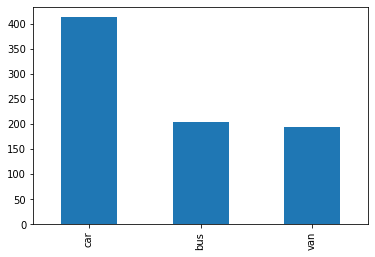

In [14]:
df['class'].value_counts().plot(kind="bar")

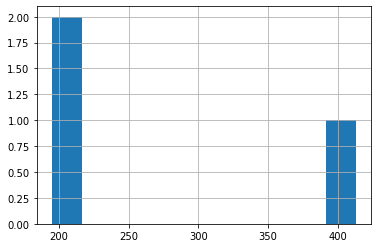

In [17]:
df['class'].value_counts().hist()

In [21]:
df.isna().sum()


compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

# Q3. Standardize the data

In [25]:
dep_df=df.drop('class',axis=1)
from scipy.stats import zscore

scaled=dep_df.apply(zscore)
scaled

from sklearn.preprocessing import StandardScaler
import numpy as np
sc=StandardScaler()
x_std=sc.fit_transform(dep_df)
x_std[:2]

array([[ 0.16323063,  0.52040788,  0.06066872,  0.26497017,  1.2832543 ,
         0.2997208 , -0.19851729,  0.12964799, -0.21715097,  0.76631152,
        -0.39739727, -0.33901388,  0.30167634, -0.32119222, -0.07152328,
         0.37128716, -0.3218087 ,  0.17183708],
       [-0.32287376, -0.61912319,  0.12406675, -0.83639333, -0.59925336,
         0.08578488, -0.59171992,  0.51433345, -0.60601383, -0.33746218,
        -0.59003405, -0.61875406, -0.50297155, -0.0535046 ,  0.53842522,
         0.14710858,  0.00340009,  0.44231829]])

# Q4. Create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end
(Use hierarchial clustering)

In [31]:
np.random.seed(101)  # for repeatability of this dataset
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

In [34]:
X=np.concatenate((a,b,c),axis=0)

print(X.shape) 

(250, 2)


# Q5. Use scatter matrix to print all the 3 distributions

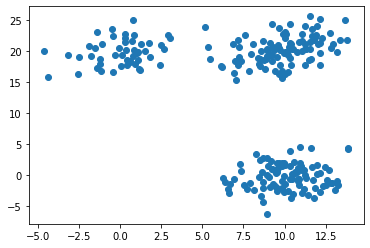

In [58]:
plt.scatter(X[:,0], X[:,1])
plt.show()

# Q6. Find out the linkage matrix

In [41]:
from scipy.cluster.hierarchy import dendrogram , linkage
Z= linkage(X,'ward', metric='euclidean')
Z.shape
T= linkage(scaled,'ward', metric='euclidean')
T.shape

(812, 4)

# Q7. Plot the dendrogram for the consolidated dataframe

Recreate the dendrogram for last 12 merged clusters

# Q8. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

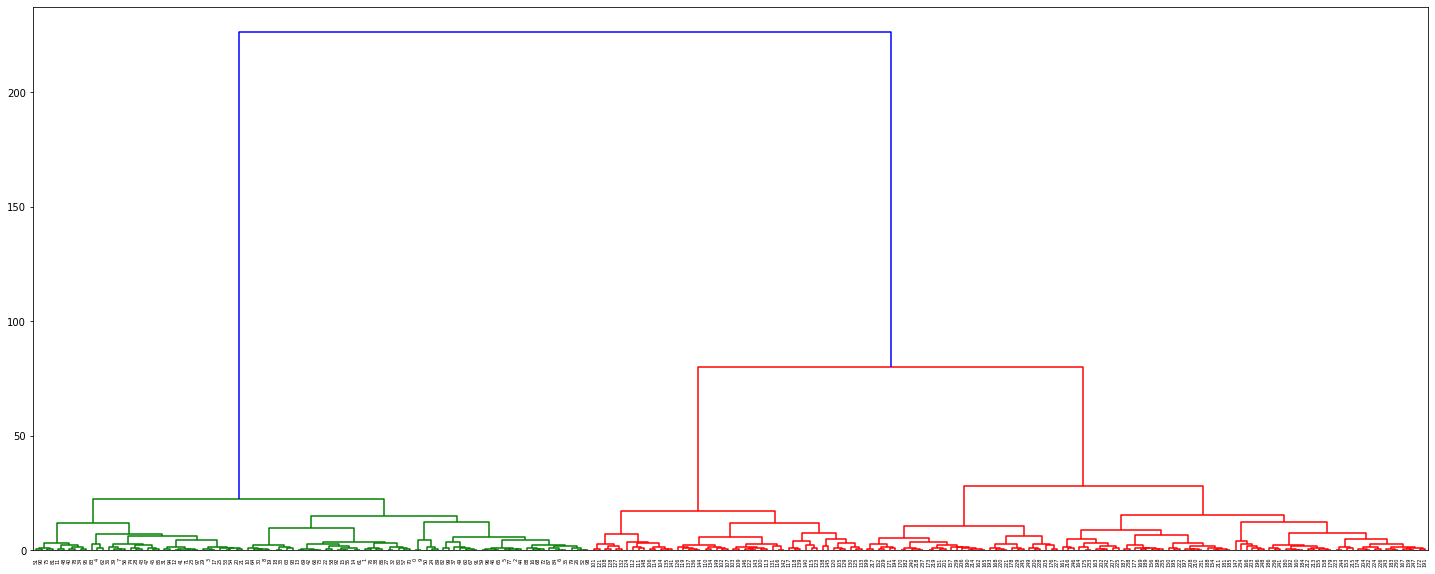

In [40]:
plt.figure(figsize=(25,10))
dendrogram(Z)
plt.show()


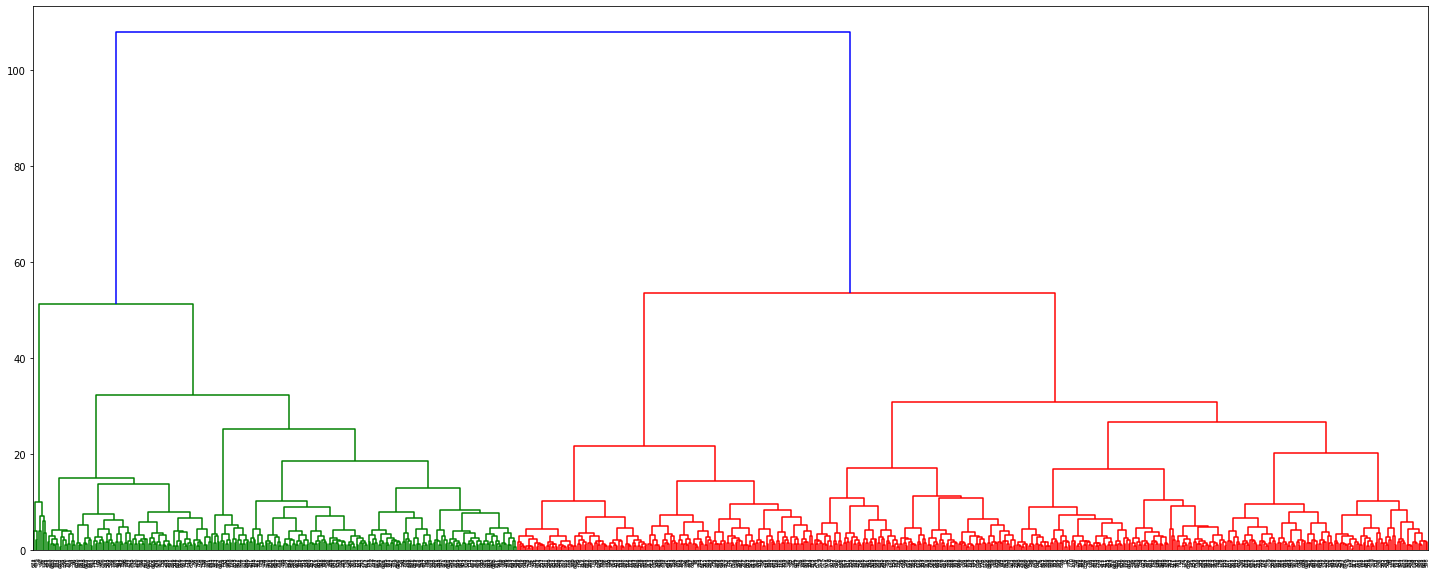

In [42]:
plt.figure(figsize=(25,10))
dendrogram(T)
plt.show()

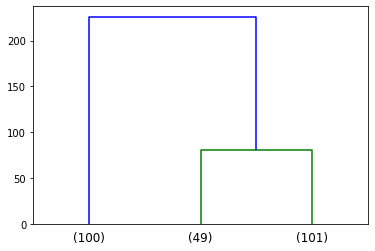

In [44]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

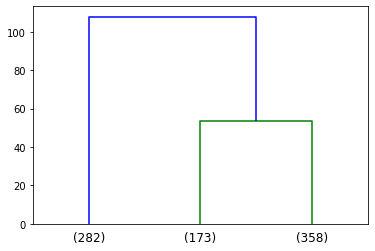

In [45]:
dendrogram(
    T,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

# Q9. Use this distance measure(max_d) and fcluster function to cluster the data into 3 different groups

In [47]:
max_d1=50
max_d2=40
from scipy.cluster.hierarchy import fcluster
clusters1 = fcluster(Z, max_d1, criterion='distance')
clusters1
clusters2 = fcluster(T, max_d2, criterion='distance')
clusters2

array([4, 4, 2, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 2, 3, 2, 2, 4, 3, 4, 4, 2,
       4, 3, 2, 2, 3, 4, 4, 4, 2, 4, 3, 1, 2, 3, 2, 3, 4, 4, 2, 4, 4, 3,
       4, 4, 3, 4, 2, 4, 2, 4, 2, 4, 2, 3, 2, 3, 3, 3, 2, 3, 2, 4, 2, 2,
       4, 3, 4, 2, 4, 3, 4, 2, 4, 3, 4, 2, 4, 3, 2, 3, 2, 4, 2, 4, 3, 2,
       3, 3, 2, 3, 1, 4, 4, 4, 2, 2, 4, 3, 2, 4, 4, 3, 3, 4, 4, 2, 2, 4,
       3, 4, 4, 4, 4, 4, 3, 4, 4, 2, 2, 4, 4, 3, 2, 1, 4, 4, 3, 4, 4, 2,
       3, 4, 2, 4, 4, 4, 4, 2, 2, 4, 2, 4, 2, 4, 4, 4, 3, 2, 4, 4, 2, 2,
       4, 2, 3, 3, 2, 2, 4, 2, 4, 4, 4, 4, 3, 2, 3, 4, 3, 2, 2, 4, 4, 2,
       4, 4, 4, 2, 4, 3, 2, 3, 3, 3, 4, 4, 2, 2, 4, 4, 4, 3, 2, 4, 4, 4,
       2, 4, 3, 2, 4, 4, 2, 4, 3, 3, 4, 2, 4, 2, 3, 3, 3, 3, 2, 4, 4, 4,
       2, 3, 4, 4, 3, 2, 4, 3, 4, 4, 2, 3, 2, 4, 4, 4, 2, 4, 4, 2, 2, 3,
       4, 4, 4, 2, 3, 4, 4, 3, 3, 2, 4, 2, 4, 3, 3, 2, 4, 2, 3, 3, 2, 4,
       4, 2, 3, 4, 1, 4, 4, 2, 4, 2, 3, 4, 4, 2, 4, 4, 4, 3, 4, 2, 2, 2,
       4, 4, 4, 2, 3, 3, 4, 2, 3, 2, 2, 3, 2, 4, 3,

# Q10. Use matplotlib to visually observe the clusters in 2D space

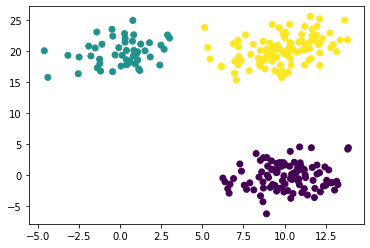

In [59]:
#### plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=clusters)  # plot points with cluster dependent colors
plt.show()